# Preprocessing

In [22]:
#Import Libraries
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
# Variable Definitions
CSV_FILE_PATH = os.path.join('archive', 'diabetes.csv')

In [24]:
data = pd.read_csv(CSV_FILE_PATH)
data.head(7)
#Data dipanggil, lalu dicoba munculkan 7 teratas untuk memastikan data sudah sesuai framenya

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1


In [25]:
data.isnull().values.any()
#memastikan dataset tidak memiliki null values dimana pun

False

In [26]:
data.isna().sum()
#pengecekkan ulang per kolom tidak ada null values

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [27]:
data.dtypes
#memastikan kolom memiliki jenis data yang tepat supaya tidak membuat alogritma machine learning mengalami masalah

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [28]:
data.describe()
#statistik deskripritif dari data setiap kolom dalam dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

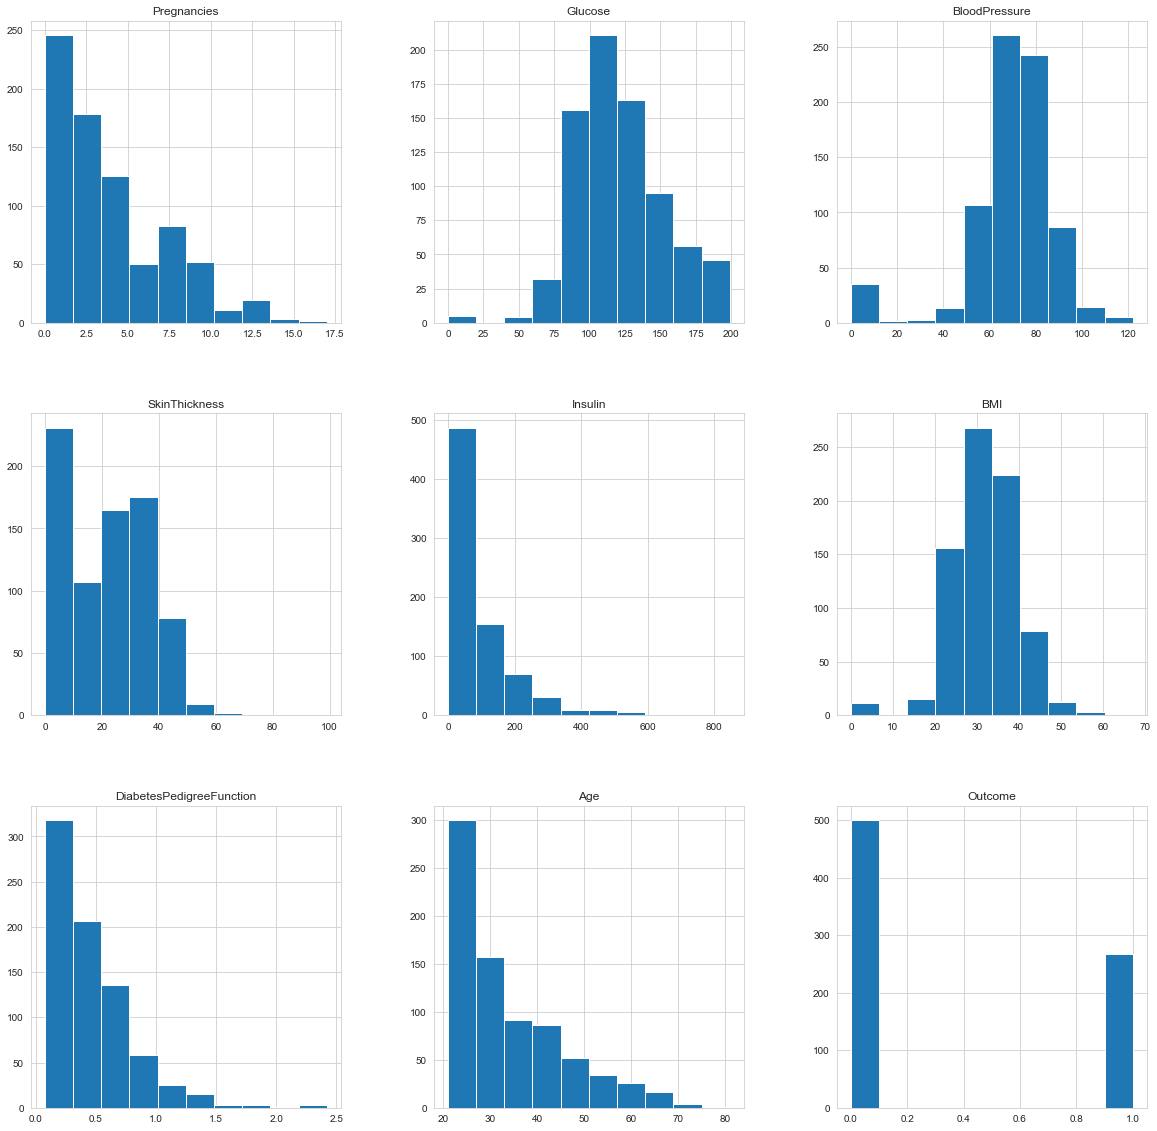

In [29]:
data.hist(figsize = (20,20))
#visualisasi data dari setiap nilai kolom

<AxesSubplot:xlabel='DiabetesPedigreeFunction'>

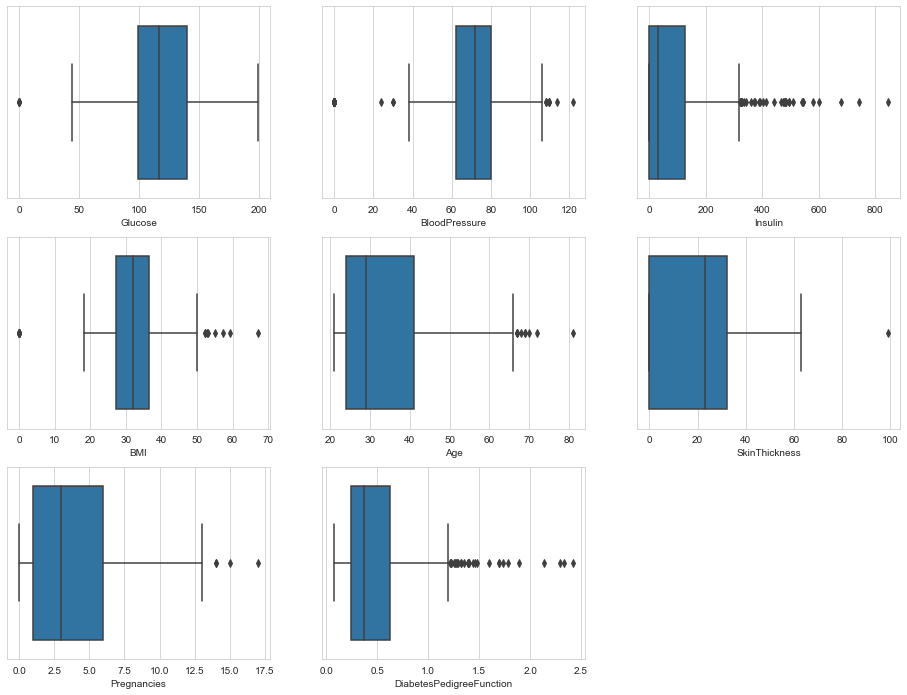

In [30]:
plt.figure(figsize=(16,12))
sns.set_style(style='whitegrid')
plt.subplot(3,3,1)
sns.boxplot(x='Glucose',data=data)
plt.subplot(3,3,2)
sns.boxplot(x='BloodPressure',data=data)
plt.subplot(3,3,3)
sns.boxplot(x='Insulin',data=data)
plt.subplot(3,3,4)
sns.boxplot(x='BMI',data=data)
plt.subplot(3,3,5)
sns.boxplot(x='Age',data=data)
plt.subplot(3,3,6)
sns.boxplot(x='SkinThickness',data=data)
plt.subplot(3,3,7)
sns.boxplot(x='Pregnancies',data=data)
plt.subplot(3,3,8)
sns.boxplot(x='DiabetesPedigreeFunction',data=data)

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

<AxesSubplot:>

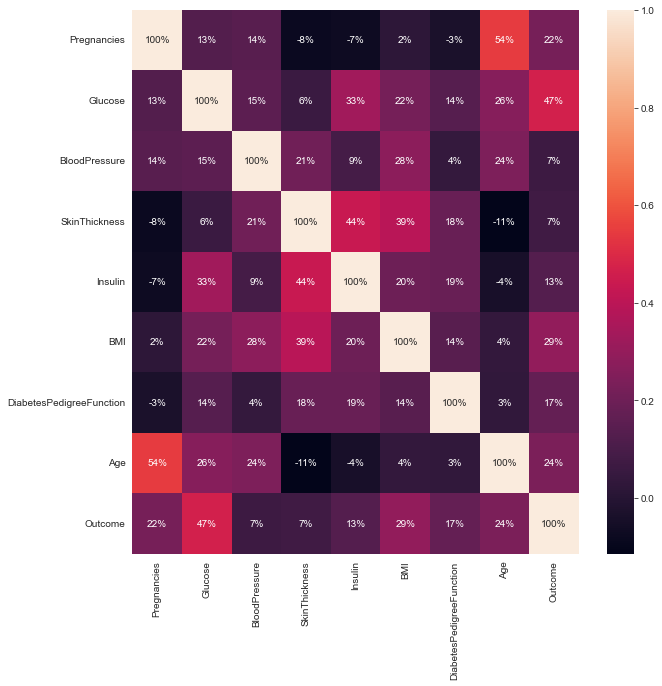

In [31]:
corr = data.corr()
print(corr)
plt.figure(figsize=(10,10))
sns.heatmap(corr, 
         xticklabels=corr.columns, 
         yticklabels=corr.columns,
         annot=True,
         fmt='.0%')

In [32]:

from sklearn.preprocessing import QuantileTransformer
quantile  = QuantileTransformer()
X = quantile.fit_transform(data)
data=quantile.transform(X)
data=pd.DataFrame(X)
data.columns =['Pregnancies', 'Glucose','BloodPressure','SkinThickness','Insulin','BMI', 'DiabetesPedigreeFunction','Age','Outcome']
data.head()



e:\Binus\Semester 5\Data & Text Mining\SupervisedLearning\venv\lib\site-packages\sklearn\preprocessing\_data.py:2588: UserWarning: n_quantiles (1000) is greater than the total number of samples (768). n_quantiles is set to n_samples.
  warnings.warn(
e:\Binus\Semester 5\Data & Text Mining\SupervisedLearning\venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.747718,0.810300,0.516949,0.801825,0.000000,0.591265,0.750978,0.889831,1.0
1,0.232725,0.097784,0.336375,0.644720,0.000000,0.227510,0.475880,0.558670,0.0
2,0.863755,0.956975,0.279009,0.000000,0.000000,0.091917,0.782269,0.585398,1.0
3,0.232725,0.131030,0.336375,0.505867,0.662973,0.298566,0.106258,0.000000,0.0
4,0.000000,0.721643,0.050847,0.801825,0.834420,0.926988,0.997392,0.606258,1.0


<AxesSubplot:xlabel='DiabetesPedigreeFunction'>

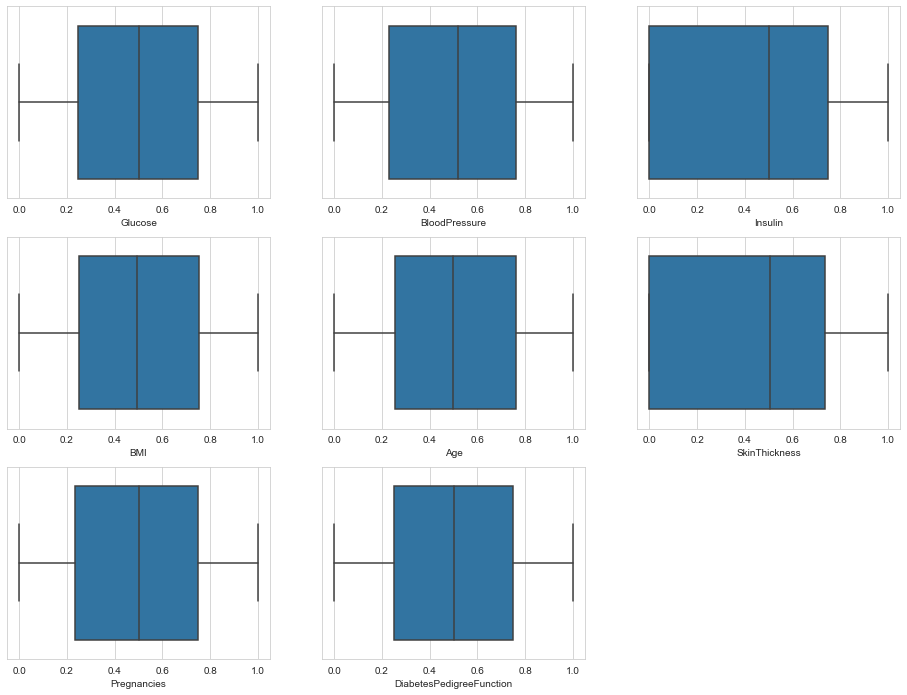

In [33]:
plt.figure(figsize=(16,12))
sns.set_style(style='whitegrid')
plt.subplot(3,3,1)
sns.boxplot(x='Glucose',data=data)
plt.subplot(3,3,2)
sns.boxplot(x='BloodPressure',data=data)
plt.subplot(3,3,3)
sns.boxplot(x='Insulin',data=data)
plt.subplot(3,3,4)
sns.boxplot(x='BMI',data=data)
plt.subplot(3,3,5)
sns.boxplot(x='Age',data=data)
plt.subplot(3,3,6)
sns.boxplot(x='SkinThickness',data=data)
plt.subplot(3,3,7)
sns.boxplot(x='Pregnancies',data=data)
plt.subplot(3,3,8)
sns.boxplot(x='DiabetesPedigreeFunction',data=data)

In [34]:
import pandas as pd
import os
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [35]:
# Variable Definitions
CSV_FILE_PATH = os.path.join('archive', 'diabetes.csv')

In [36]:
# data = pd.read_csv(CSV_FILE_PATH)
# data.head()

# Decision Tree

In [37]:
independent_var = ['Pregnancies', 'Insulin', 'BMI', 'Age', 'Glucose', 'BloodPressure', 'DiabetesPedigreeFunction']
x = data[independent_var]
y = data.Outcome

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=34)

In [39]:
classifier = DecisionTreeClassifier(max_depth=3)
classifier = classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

In [58]:
from sklearn.metrics import f1_score, precision_score, recall_score

decision_tree_accuracy = metrics.accuracy_score(y_test, y_pred)*100
print(f'Accuracy: {decision_tree_accuracy:.2f}%')
print("\n F1:\n",f1_score(y_test,y_pred))
print("\n Precision score is:\n",precision_score(y_test,y_pred))
print("\n Recall score is:\n",recall_score(y_test,y_pred))

Accuracy: 82.47%

 F1:
 0.7096774193548386

 Precision score is:
 0.75

 Recall score is:
 0.673469387755102


In [41]:
from sklearn import tree
import matplotlib.pyplot as plt

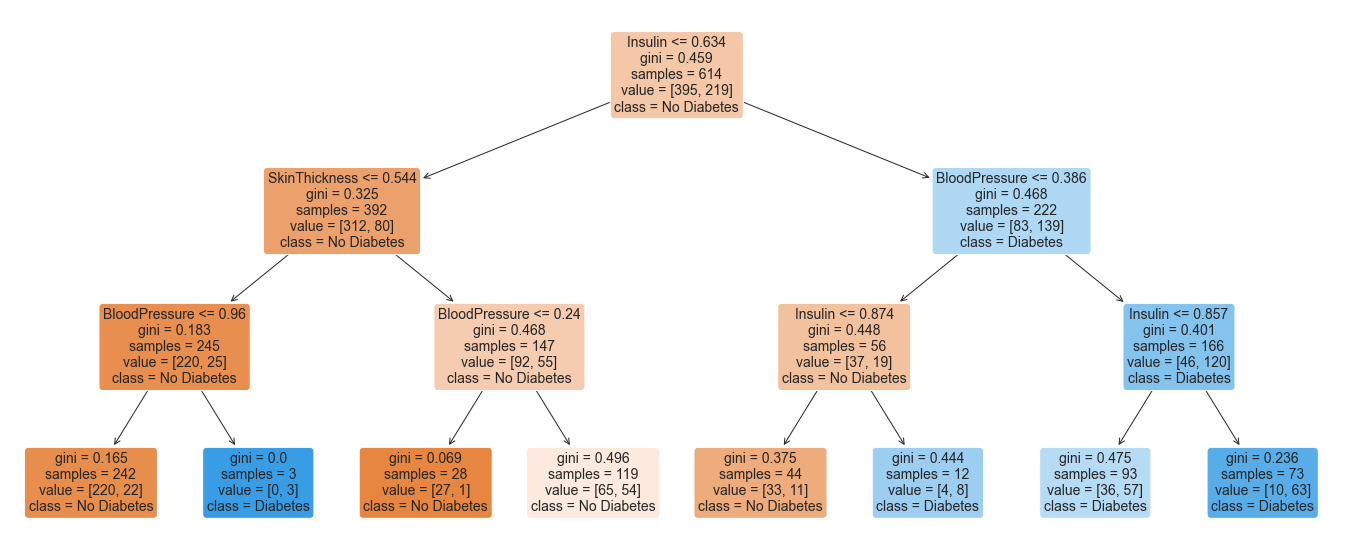

In [42]:
class_names = ['No Diabetes', 'Diabetes']
feature_names = list(data.columns)
plt.figure(figsize=(24,10))
tree.plot_tree(classifier, fontsize=14, class_names=class_names, feature_names=feature_names, filled=True, rounded=True)
plt.show()

# Logistic Regression

In [43]:
import os
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split



In [44]:
independent_var = ['Pregnancies', 'Insulin', 'BMI', 'Age', 'Glucose', 'BloodPressure', 'DiabetesPedigreeFunction']
x = data[independent_var]
y = data.Outcome
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=34)



In [45]:
dataCheck = LogisticRegression(max_iter=1000)
dataCheck.fit(x_train, y_train)
dataCheck.coef_

array([[ 0.74668191, -0.21015701,  1.81736422,  1.23116508,  2.96673338,
        -0.17959609,  1.08290634]])

In [60]:
from sklearn.metrics import f1_score, precision_score, recall_score

y_pred = dataCheck.predict(x_test)

logistic_regression_accuracy = dataCheck.score(x_test, y_test) * 100
print(f'Accuracy: {logistic_regression_accuracy:.2f}%')
print("\n F1:\n",f1_score(y_test,y_pred))
print("\n Precision score is:\n",precision_score(y_test,y_pred))
print("\n Recall score is:\n",recall_score(y_test,y_pred))

Accuracy: 81.82%

 F1:
 0.702127659574468

 Precision score is:
 0.7333333333333333

 Recall score is:
 0.673469387755102


[Text(0, 0, '-0.210157'),
 Text(0, 0, '-0.179596'),
 Text(0, 0, '0.746682'),
 Text(0, 0, '1.08291'),
 Text(0, 0, '1.23117'),
 Text(0, 0, '1.81736'),
 Text(0, 0, '2.96673')]

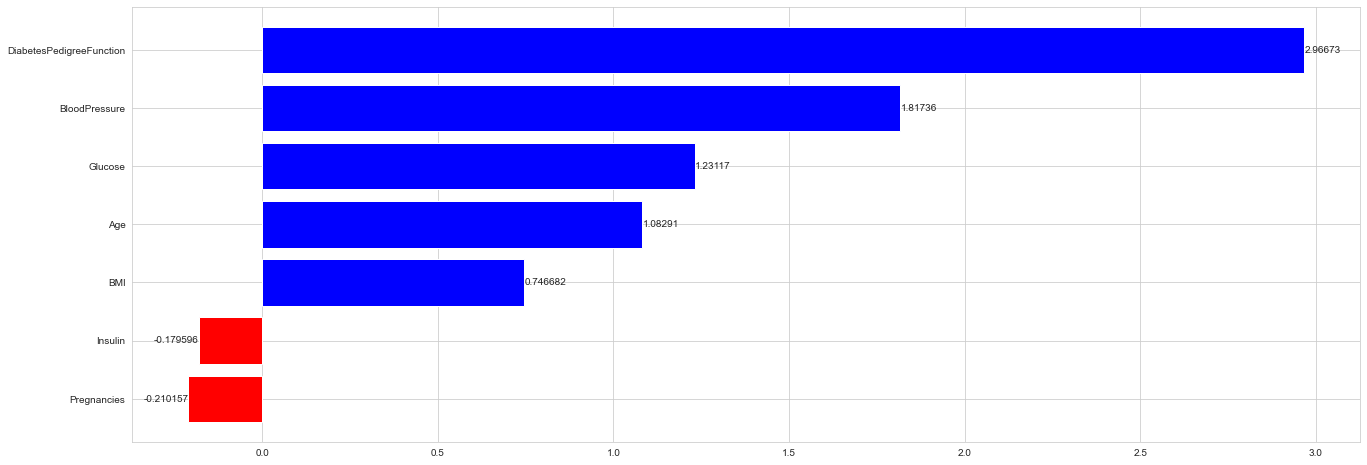

In [47]:
labels = list(x_train.columns)
coeff = list(dataCheck.coef_[0])
coeff = sorted(coeff)
sorted_coeff = list(range(len(coeff)))

fig, ax = plt.subplots(figsize=(22,8))

colors = list(map(lambda x: 'blue' if x > 0 else 'red', coeff))

ax.barh(sorted_coeff, coeff, color=colors)
ax.set_yticks(sorted_coeff)
ax.set_yticklabels(labels)

ax.bar_label(ax.containers[0])

# Random Forest

In [48]:
import os
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings("ignore")

In [49]:
independent_var = ['Pregnancies', 'Insulin', 'BMI', 'Age', 'Glucose', 'BloodPressure', 'DiabetesPedigreeFunction']
x = data[independent_var]
y = data.Outcome
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=34)

In [50]:
random_forest = RandomForestClassifier().fit(x_train, y_train)
y_pred = random_forest.predict(x_test)

In [51]:
f'Accuracy: {random_forest.score(x_test, y_pred) * 100:.2f}%'

'Accuracy: 100.00%'

In [80]:
rf_params_ = {'n_estimators': [*range(100,700+1,100)],
              'min_samples_split': [*range(2,10+1)],
              'min_samples_leaf': [*range(1,10+1)]}

rf_model = RandomForestClassifier(random_state=34)

rf_cv_model = RandomizedSearchCV(rf_model, rf_params_, cv=5, n_jobs=-1, verbose=1).fit(x_train, y_train)
rf_cv_model = RandomForestClassifier(**rf_cv_model.best_params_).fit(x_train, y_train)
y_pred = rf_cv_model.predict(x_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [81]:
from sklearn.metrics import f1_score, precision_score, recall_score

random_forest_accuracy = random_forest.score(x_test, y_pred) * 100
f'Accuracy after Cross Validation: {random_forest_accuracy:.2f}%'
print(f'Accuracy: {random_forest_accuracy:.2f}%')
print("\n F1:\n",f1_score(y_test,y_pred))
print("\n Precision score is:\n",precision_score(y_test,y_pred))
print("\n Recall score is:\n",recall_score(y_test,y_pred))

Accuracy: 93.51%

 F1:
 0.7422680412371135

 Precision score is:
 0.75

 Recall score is:
 0.7346938775510204


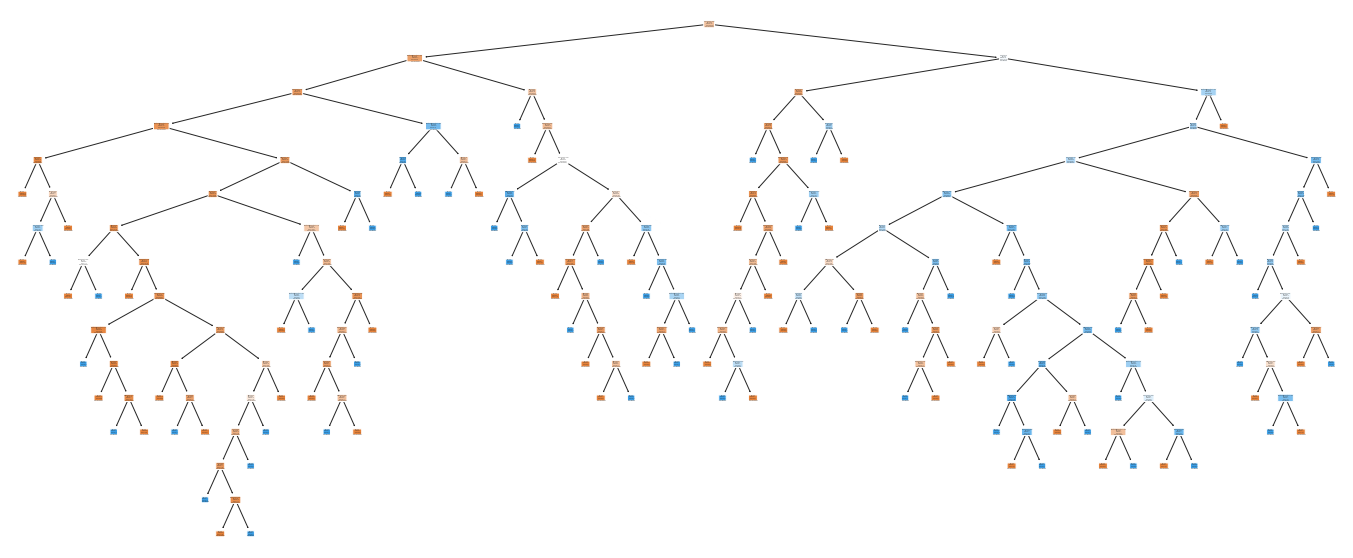

In [53]:
class_names = ['No Diabetes', 'Diabetes']
feature_names = list(data.columns)
plt.figure(figsize=(24,10))
tree.plot_tree(random_forest.estimators_[0], fontsize=1, class_names=class_names, feature_names=feature_names, filled=True, rounded=True) 
plt.show()

[Text(0, 0, '0.0824183'),
 Text(0, 0, '0.0937989'),
 Text(0, 0, '0.0969293'),
 Text(0, 0, '0.131682'),
 Text(0, 0, '0.151009'),
 Text(0, 0, '0.177601'),
 Text(0, 0, '0.266562')]

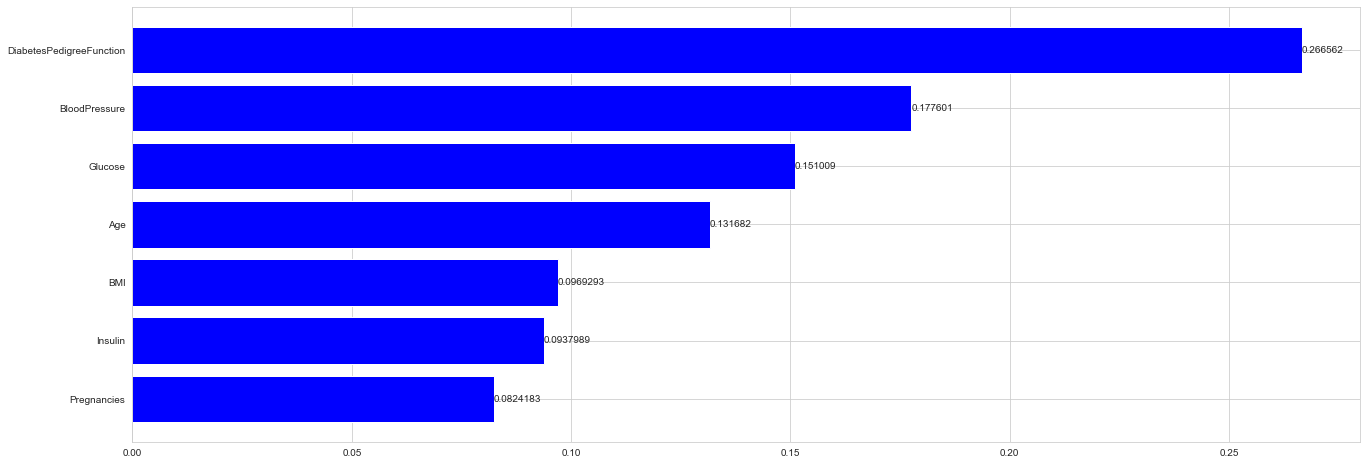

In [54]:
labels = list(x_train.columns)
coeff = list(random_forest.feature_importances_)
coeff = sorted(coeff)
sorted_coeff = list(range(len(coeff)))

fig, ax = plt.subplots(figsize=(22,8))

colors = list(map(lambda x: 'blue' if x > 0 else 'red', coeff))

ax.barh(sorted_coeff, coeff, color=colors)
ax.set_yticks(sorted_coeff)
ax.set_yticklabels(labels)

ax.bar_label(ax.containers[0])

# Comparison Between All Models

In [55]:
import seaborn as sns
import pandas as pd

{'Model': ['Decision Tree', 'Logistic Regression', 'Random Forest'], 'Accuracy': [80.51948051948052, 81.81818181818183, 93.5064935064935]}


<AxesSubplot:xlabel='Model', ylabel='Accuracy'>

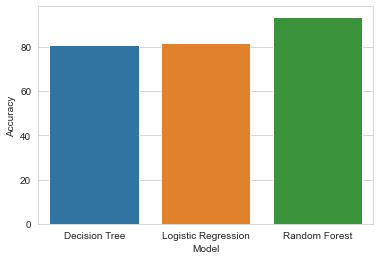

In [56]:
accuracy_dict = {
    'Model': ['Decision Tree', 'Logistic Regression', 'Random Forest'],
    'Accuracy': [decision_tree_accuracy, logistic_regression_accuracy, random_forest_accuracy]
}

print(accuracy_dict)

accuracy = pd.DataFrame(data=accuracy_dict)

acc = accuracy.groupby('Accuracy').sum().reset_index()

accuracy.head()

sns.barplot(x='Model', y='Accuracy', data=acc)